# Loading a Text File

In [15]:
import numpy as np
import matplotlib.pyplot as plt

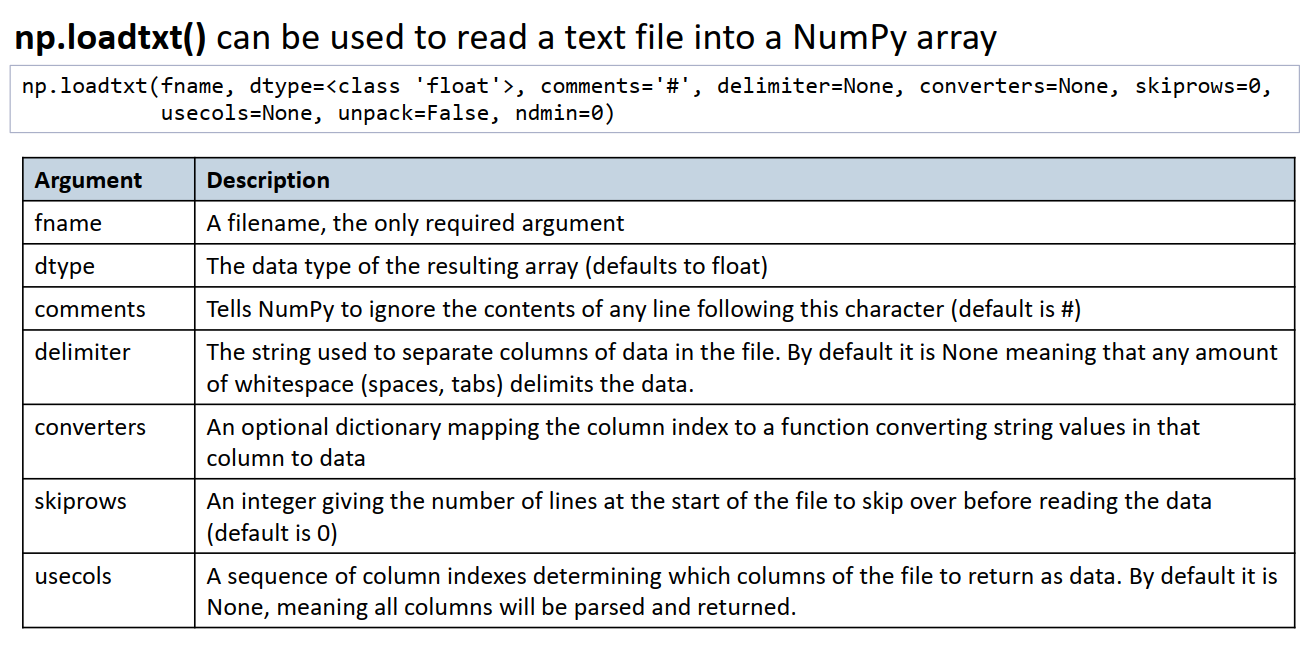

In [1]:
!dir

 Volume in drive D is Documents
 Volume Serial Number is 8DBE-F730

 Directory of D:\Projects\ExperisAcademy\Exercises\L20191205

05.12.2019  14:22    <DIR>          .
05.12.2019  14:22    <DIR>          ..
05.12.2019  14:20    <DIR>          .ipynb_checkpoints
05.12.2019  14:20           643,717 Random.ipynb
05.12.2019  14:22             1,469 student-data.txt
05.12.2019  14:22           242,888 Text.ipynb
               3 File(s)        888,074 bytes
               3 Dir(s)  40,984,195,072 bytes free


In [6]:
!type student-data.txt

# Student data collected on 17 July 2014
# Researcher: Dr Wicks, University College Newbury

# The following data relate to N = 20 students. It
# has been totally made up and so therefore is 100%
# anonymous.

Subject Sex    DOB      Height  Weight       BP     VO2max
(ID)    M/F  dd/mm/yy     m       kg        mmHg  mL.kg-1.min-1
JW-1     M    19/12/95    1.82     92.4    119/76   39.3
JW-2     M    11/1/96     1.77     80.9    114/73   35.5
JW-3     F    2/10/95     1.68     69.7    124/79   29.1
JW-6     M    6/7/95      1.72     75.5    110/60   45.5
# JW-7    F    28/3/96     1.66     72.4    101/68   -
JW-9     F    11/12/95    1.78     82.1    115/75   32.3
JW-10    F    7/4/96      1.60     -       -/-      30.1
JW-11    M    22/8/95     1.72     77.2    97/63    48.8
JW-12    M    23/5/96     1.83     88.9    105/70   37.7
JW-14    F    12/1/96     1.56     56.3    108/72   26.0
JW-15    F    1/6/96      1.64     65.0    99/67    35.7
JW-16    M    10/9/95     1.63     73.0   

In [9]:
path2file = 'D:\Projects\ExperisAcademy\Exercises\L20191205\student-data.txt'
dtypes = np.dtype([('gender','S1'), ('height','f8')])
students = np.loadtxt(path2file, skiprows=9, dtype=dtypes, usecols=(1,3))

In [10]:
students

array([(b'M', 1.82), (b'M', 1.77), (b'F', 1.68), (b'M', 1.72),
       (b'F', 1.78), (b'F', 1.6 ), (b'M', 1.72), (b'M', 1.83),
       (b'F', 1.56), (b'F', 1.64), (b'M', 1.63), (b'M', 1.67),
       (b'M', 1.66), (b'F', 1.59), (b'F', 1.7 ), (b'M', 1.97),
       (b'F', 1.66), (b'F', 1.63), (b'M', 1.69)],
      dtype=[('gender', 'S1'), ('height', '<f8')])

In [28]:
males = (students['gender'] == b'M')

In [29]:
student_males = students[males]

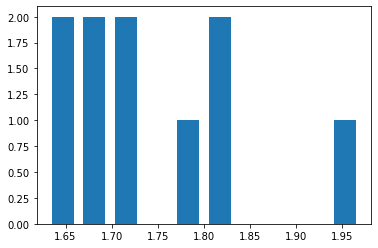

In [30]:
_ = plt.hist(student_males['height'], rwidth=0.7)

In [31]:
females = students['height'][~males]

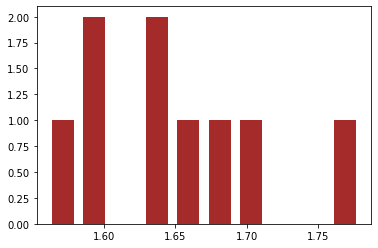

In [36]:
_ = plt.hist(females, rwidth=0.7, color='brown')

In [37]:
def parse_weight(s):
    try:
        return float(s)
    except ValueError:
        return -99

In [38]:
path2file = 'D:\Projects\ExperisAcademy\Exercises\L20191205\student-data.txt'
dtypes = np.dtype([('gender','S1'), ('weight','f8')])
students2 = np.loadtxt(path2file,
                      skiprows=9,
                      dtype=dtypes,
                      usecols=(1,4),
                      converters={4: parse_weight})

In [39]:
students2

array([(b'M',  92.4), (b'M',  80.9), (b'F',  69.7), (b'M',  75.5),
       (b'F',  82.1), (b'F', -99. ), (b'M',  77.2), (b'M',  88.9),
       (b'F',  56.3), (b'F',  65. ), (b'M',  73. ), (b'M',  89.8),
       (b'M',  75.1), (b'F',  67.3), (b'F', -99. ), (b'M',  89.2),
       (b'F',  63.8), (b'F',  64.4), (b'M', -99. )],
      dtype=[('gender', 'S1'), ('weight', '<f8')])

In [43]:
s2valid = students2['weight'] > 0
s2males = students2['gender'] == b'M'

In [45]:
s2males_avg = students2[s2valid & s2males]['weight'].mean()
s2females_avg = students2[s2valid & ~s2males]['weight'].mean()

In [46]:
print(s2males_avg, s2females_avg)

82.44444444444444 66.94285714285715


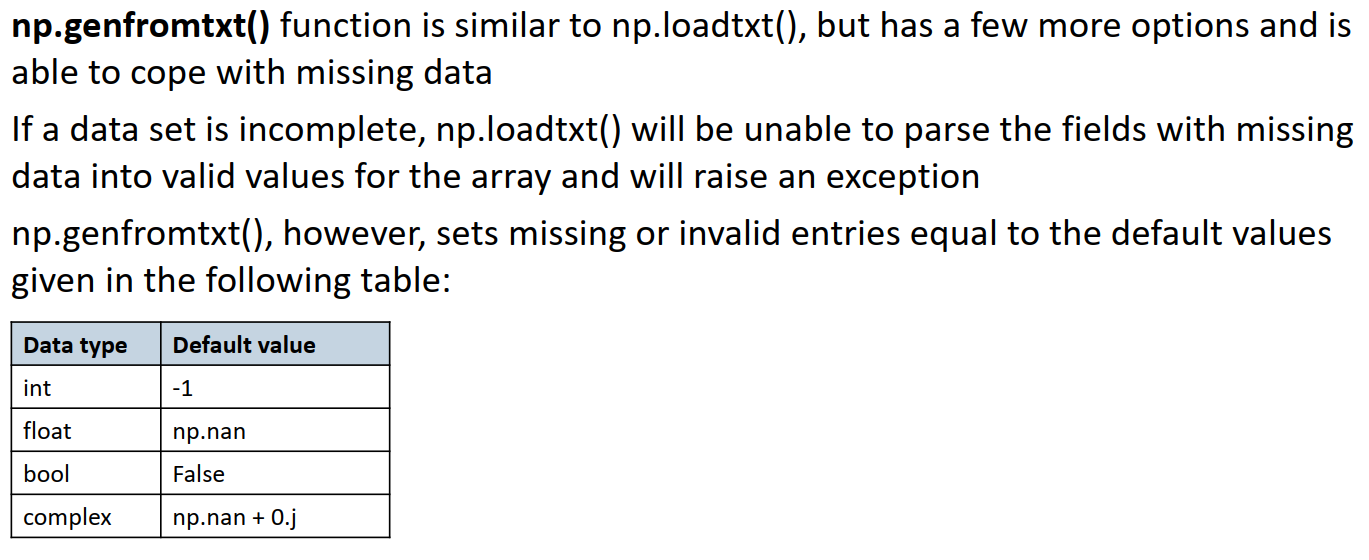

In [57]:
dtypes_gen = np.dtype(
    [
        ('subject','S5'),
        ('sex','S1'),
        ('DoB','S8'),
        ('height','f8'),
        ('weight','f8'),
        ('bp','S6'),
        ('vo2max','f8')
    ]
)
students_gen = np.genfromtxt(path2file, dtype=dtypes_gen, skip_header=9, )

In [58]:
students_gen

array([(b'JW-1', b'M', b'19/12/95', 1.82, 92.4, b'119/76', 39.3),
       (b'JW-2', b'M', b'11/1/96', 1.77, 80.9, b'114/73', 35.5),
       (b'JW-3', b'F', b'2/10/95', 1.68, 69.7, b'124/79', 29.1),
       (b'JW-6', b'M', b'6/7/95', 1.72, 75.5, b'110/60', 45.5),
       (b'JW-9', b'F', b'11/12/95', 1.78, 82.1, b'115/75', 32.3),
       (b'JW-10', b'F', b'7/4/96', 1.6 ,  nan, b'-/-', 30.1),
       (b'JW-11', b'M', b'22/8/95', 1.72, 77.2, b'97/63', 48.8),
       (b'JW-12', b'M', b'23/5/96', 1.83, 88.9, b'105/70', 37.7),
       (b'JW-14', b'F', b'12/1/96', 1.56, 56.3, b'108/72', 26. ),
       (b'JW-15', b'F', b'1/6/96', 1.64, 65. , b'99/67', 35.7),
       (b'JW-16', b'M', b'10/9/95', 1.63, 73. , b'131/84', 29.9),
       (b'JW-17', b'M', b'17/2/96', 1.67, 89.8, b'101/76', 40.2),
       (b'JW-18', b'M', b'31/7/96', 1.66, 75.1, b'-/-',  nan),
       (b'JW-19', b'F', b'30/10/95', 1.59, 67.3, b'103/69', 33.5),
       (b'JW-22', b'F', b'9/3/96', 1.7 ,  nan, b'119/80', 30.9),
       (b'JW-23', b'M', 

# Exercise

In [4]:
import numpy as np

In [5]:
!dir

 Volume in drive D is Documents
 Volume Serial Number is 4876-A15C

 Directory of D:\Projects\ExperisAcademy\Exercises\L20191205

05.12.2019  16:51    <DIR>          .
05.12.2019  16:51    <DIR>          ..
05.12.2019  16:51    <DIR>          .ipynb_checkpoints
05.12.2019  16:51             1,181 mountain-data.txt
05.12.2019  16:51           644,279 Random.ipynb
05.12.2019  16:51             1,499 student-data.txt
05.12.2019  16:51           463,131 Text.ipynb
               4 File(s)      1,110,090 bytes
               3 Dir(s)  16,949,743,616 bytes free


In [6]:
!type mountain-data.txt

----------------------------------------------------------------------
Name         	Height 	First ascent First winter Location
				m 	  	date 		 ascent date   (WGS84)
----------------------------------------------------------------------
Annapurna I	    8091	3/6/1950	3/2/1987	28d35m46sN	83d49m13sE
Broad Peak	    8051	9/6/1957	5/3/2013	35d48m39sN	76d34m06sE
Cho Oyu	        8201	19/10/1954	12/2/1985	28d05m39sN	86d39m39sE
Dhaulagiri I	8167	13/5/1960	21/1/1985	27d59m17sN	86d55m31sE
Everest	        8848	29/5/1953	17/2/1980	27d59m17sN	86d55m31sE
Gasherbrum I	8080	5/7/1958	9/3/2012	35d43m28sN	76d41m47sE
Gasherbrum II	8034	7/7/1956	2/2/2011	35d45m30sN	76d39m12sE
K2	            8611	31/7/1954	-          	35d52m57sN	76d30m48sE
Kangchenjunga	8568	25/5/1955	11/1/1986	27d42m09sN	88d08m54sE
Lhotse	        8516	18/5/1956	31/12/1988	27d57m42sN	86d56m00sE
Makalu	        8485	15/5/1955	9/2/2009	27d53m21sN	87d05m19sE
Manaslu	        8163	9/5/1956	12/1/1984	28d33m0sN	84d33m35sE
Nanga Parbat	8126	3/7/1953

In [29]:
path2file = r"D:\Projects\ExperisAcademy\Exercises\L20191205\mountain-data.txt"
dtypes = np.dtype([('name','S12'), ('height','int16'), ('first_ascent', 'uint32'),
                   ('first_winter','uint32'), ('location_N','uint16'), ('location_E','uint16')])

In [37]:
def loc_converter(s):
    s = s.decode()
    return int(f"{s[:2]}{s[3:5]}")


def date_converter(d):
    d = d.decode()
    try:
        d = [int(n) for n in d.strip().split('/')]
        d = f"{d[2]:>04}{d[1]:>02}{d[0]:>02}"
        return int(d)
    except ValueError:
        return 0

In [38]:
mountains = np.genfromtxt(fname=path2file, dtype=dtypes, skip_header=4, skip_footer=1, delimiter='\t',
                          converters={2: date_converter, 3: date_converter,
                                      4: loc_converter, 5: loc_converter}
                         )
mountains

array([(b'Annapurna I', 8091, 19500603, 19870203, 2835, 8349),
       (b'Broad Peak', 8051, 19570609, 20130305, 3548, 7634),
       (b'Cho Oyu', 8201, 19541019, 19850212, 2805, 8639),
       (b'Dhaulagiri I', 8167, 19600513, 19850121, 2759, 8655),
       (b'Everest', 8848, 19530529, 19800217, 2759, 8655),
       (b'Gasherbrum I', 8080, 19580705, 20120309, 3543, 7641),
       (b'Gasherbrum I', 8034, 19560707, 20110202, 3545, 7639),
       (b'K2', 8611, 19540731,        0, 3552, 7630),
       (b'Kangchenjung', 8568, 19550525, 19860111, 2742, 8808),
       (b'Lhotse', 8516, 19560518, 19881231, 2757, 8656),
       (b'Makalu', 8485, 19550515, 20090209, 2753, 8705),
       (b'Manaslu', 8163, 19560509, 19840112, 2833, 8433),
       (b'Nanga Parbat', 8126, 19530703,        0, 3514, 7435),
       (b'Shishapangma', 8027, 19640502, 20050114, 2821, 8546)],
      dtype=[('name', 'S12'), ('height', '<i2'), ('first_ascent', '<u4'), ('first_winter', '<u4'), ('location_N', '<u2'), ('location_E', '<u2')

In [39]:
print(f"Q1: The lowest 8,000 peak is: {mountains[mountains[mountains['height'] > 8000]['height'].argmin()]}")

Q1: The lowest 8,000 peak is: (b'Shishapangma', 8027, 19640502, 20050114, 2821, 8546)


In [40]:
print(f"Q2-1: most northely peak is: {mountains[mountains['location_N'].argmax()]}")
print(f"Q2-2: most southerly peak is: {mountains[mountains['location_N'].argmin()]}")
print(f"Q2-3: most easterly peak is: {mountains[mountains['location_E'].argmax()]}")
print(f"Q2-4: most westerly peak is: {mountains[mountains['location_E'].argmin()]}")

Q2-1: most northely peak is: (b'K2', 8611, 19540731, 0, 3552, 7630)
Q2-2: most southerly peak is: (b'Kangchenjung', 8568, 19550525, 19860111, 2742, 8808)
Q2-3: most easterly peak is: (b'Kangchenjung', 8568, 19550525, 19860111, 2742, 8808)
Q2-4: most westerly peak is: (b'Nanga Parbat', 8126, 19530703, 0, 3514, 7435)


In [41]:
print(f"The latest ascent: {mountains[mountains['first_ascent'].argmax()]}")

The latest ascent: (b'Shishapangma', 8027, 19640502, 20050114, 2821, 8546)
